# Tarea 4 - Regresión y Clasificación

## Juan Sebastián Cortés Sánchez

# - Red neuronal de clasificación binaria para predecir el cáncer de seno (Breast Cancer Wisconsin) -

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
#
#from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
#
from tensorflow.keras.layers import Dense, Input, Activation
#
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
#
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
#
#from sklearn import KFold
print("Versión de Tensorflow:", tf.__version__)

Versión de Tensorflow: 2.4.1


In [2]:
# lee los datos
Datos = pd.read_csv('C:/Users/jseba/Documents/Universidad/VIV semestre/Mineria de datos/Tareas/data.csv')
Datos.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
Datos.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


Se evidencia que existen algunas columnas (*id* y *Unnamed: 32*) las cuales no contribuyen a la predicción del cáncer de seno por lo que serán removidas del conjunto de datos.

In [5]:
Datos.drop(['id','Unnamed: 32'], axis = 1, inplace = True)
Datos.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Asignar las columnas de características a $X$ y la columna de destino a $Y$.

In [6]:
Y = Datos['diagnosis']
Y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [7]:
X = Datos.drop('diagnosis', axis = 1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Reemplazamos los valores **M** (Malignant) y **B** (Benign) de la columna $Y$, por valores de $1$ y $0$ respectivamente al ser de clasificación binaria.

In [8]:
Y = Y.replace(['M'], 1)
Y = Y.replace(['B'], 0)
Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [9]:
X.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

Haciendo uso de *"sklearn"*, se dividen los datos proporcionados como datos de entrenamiento y datos de prueba.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3) # Fijamos el tamaño de muestra del conjunto de prueba en un 30% del total de los datos.

Se intenta escalar el conjunto de datos dado para disminuir el descenso del gradiente y evitar el sobreajuste de los datos del conjunto de prueba que solo escalamos al conjunto de entrenamiento.

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

N, D = X_train.shape

Se plantea un modelo *Keras* 2.0 para este problema de clasificación.

In [12]:
import tensorflow as tf 
from tensorflow import keras

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
# Se implementa el modelo en el conjunto de datos de prueba para un total de 175 repeticiones #
Prueba = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=175)

Epoch 1/175
13/13 [==============================] - 4s 164ms/step - loss: 0.8652 - accuracy: 0.4893 - val_loss: 0.8177 - val_accuracy: 0.5146
Epoch 2/175
13/13 [==============================] - 0s 5ms/step - loss: 0.8237 - accuracy: 0.5178 - val_loss: 0.7694 - val_accuracy: 0.5789
Epoch 3/175
13/13 [==============================] - 0s 4ms/step - loss: 0.7902 - accuracy: 0.5214 - val_loss: 0.7258 - val_accuracy: 0.6257
Epoch 4/175
13/13 [==============================] - 0s 4ms/step - loss: 0.7287 - accuracy: 0.5820 - val_loss: 0.6852 - val_accuracy: 0.7018
Epoch 5/175
13/13 [==============================] - 0s 4ms/step - loss: 0.6695 - accuracy: 0.6815 - val_loss: 0.6492 - val_accuracy: 0.7251
Epoch 6/175
13/13 [==============================] - 0s 4ms/step - loss: 0.6799 - accuracy: 0.7045 - val_loss: 0.6164 - val_accuracy: 0.7485
Epoch 7/175
13/13 [==============================] - 0s 4ms/step - loss: 0.6131 - accuracy: 0.7747 - val_loss: 0.5883 - val_accuracy: 0.7953
Epoch 8/175

In [14]:
# Visualización de la precisión del modelo #
Precision = model.evaluate(X_test, Y_test)[1] * 100
Precision = str(Precision)[:5]
!echo 
print('El modelo tiene una precisión del {}%.'.format(Precision[:5]))

6/6 [==============================] - 0s 798us/step - loss: 0.1251 - accuracy: 0.9825
ECHO est  activado.
El modelo tiene una precisión del 98.24%.


Se plantean un par de gráficos para verificar estos resultados.

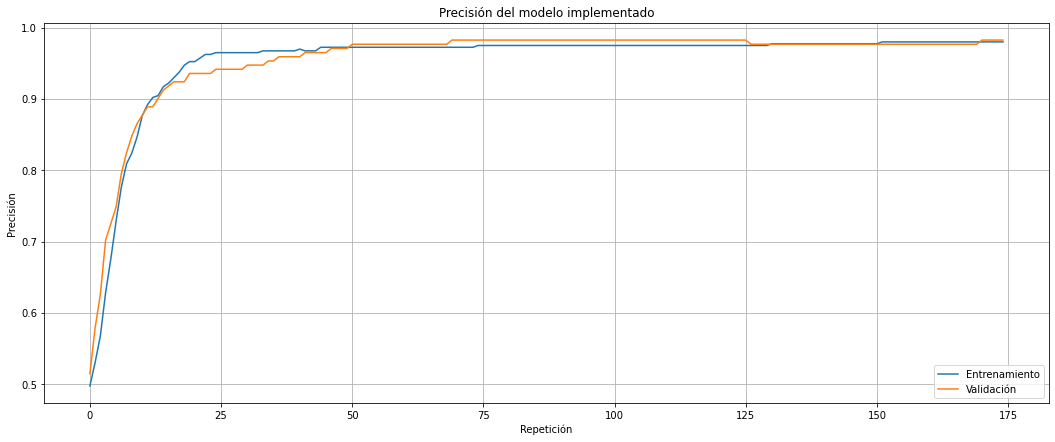

In [15]:
# Gráfico 1 #
# Se muestra un gráfico de la precisión del modelo en comparación con el conjunto de datos de prueba
plt.figure(figsize=(18, 7))
plt.grid(True)
plt.plot(Prueba.history['accuracy'])
plt.plot(Prueba.history['val_accuracy'])
plt.title('Precisión del modelo implementado')
plt.ylabel('Precisión')
plt.xlabel('Repetición')
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
plt.show()

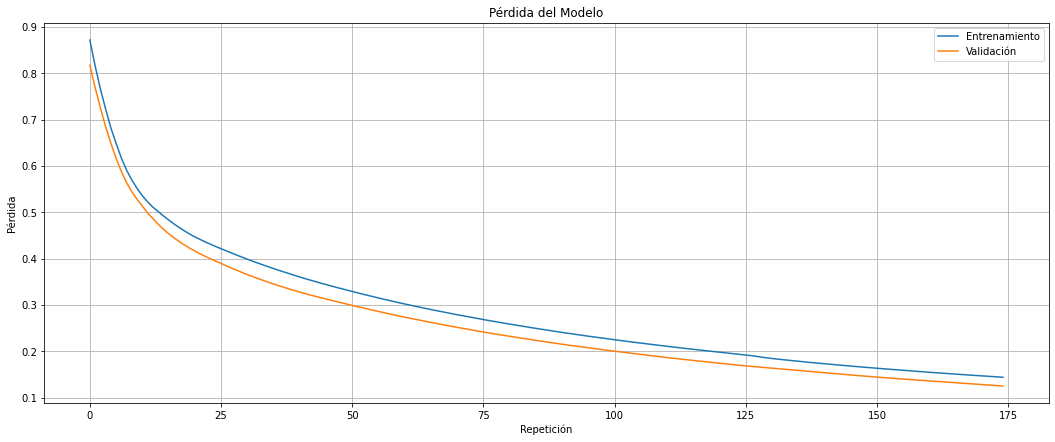

In [16]:
# Gráfico 2 #
# Se muestra un gráfico de la función de pérdida con respecto al número de repeticiones
plt.figure(figsize=(18, 7))
plt.grid(True)
plt.plot(Prueba.history['loss'])
plt.plot(Prueba.history['val_loss'])
plt.title('Pérdida del Modelo')
plt.ylabel('Pérdida')
plt.xlabel('Repetición')
plt.legend(['Entrenamiento', 'Validación'], loc='upper right')
plt.show() 

**Evaluación del modelo**

In [17]:
Predicciones = model.predict_classes(X_test)

D:\Universidad Nacional\Programas\Anaconda\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [18]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(Y_test, Predicciones))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       101
           1       0.99      0.97      0.98        70

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



Confussion Matrix: 
[[100   1]
 [  2  68]]



<AxesSubplot:>

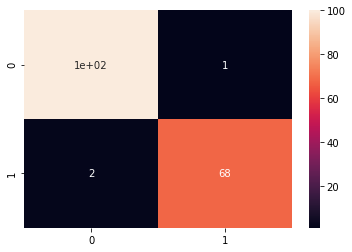

In [19]:
Matriz_Confusion = confusion_matrix(Y_test, Predicciones)

print(f'Confussion Matrix: \n{Matriz_Confusion}\n')

sns.heatmap(Matriz_Confusion, annot=True)

# - Red neuronal de regresión para predecir el precio de las viviendas (Boston Housing) -

In [19]:
# lee los datos
# A continuación, cargamos los datos en un objeto 'dataframe' para facilitar la manipulación, y también imprimimos las primeras filas para examinarlo
# Datos2 = pd.read_csv('C:/Users/jseba/Documents/Universidad/VIV semestre/Mineria de datos/Tareas/HousingData.csv')
# Datos2.head()

In [20]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
# from sklearn import cross_validate
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn import preprocessing
import tensorflow as tf
#from tensorflow.contrib import learn
import tflearn
import pandas as pd

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [21]:
# Se obtienen los datos
from sklearn.datasets import load_boston
Boston = load_boston()
print( "type of boston = ", type(Boston))

type of boston =  <class 'sklearn.utils.Bunch'>


In [22]:
Boston.keys()
print(Boston.feature_names)
print( "target = ",",".join( str(k) for k in Boston.target[0:5] ),
      "...",
      ", ".join( str(k) for k in Boston.target[-5:] ) )

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
target =  24.0,21.6,34.7,33.4,36.2 ... 22.4, 20.6, 23.9, 22.0, 11.9


In [23]:
# Se convierten los datos a un Data Frame
bostonDF = pd.DataFrame( Boston.data )
bostonDF.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
# Se añaden los nombres de las columnas
bostonDF.columns = Boston.feature_names
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
#Añadiendo el objetivo al dataframe
bostonDF['PRICE' ] = Boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [27]:
X = bostonDF.drop( 'PRICE', axis = 1 )
y = bostonDF['PRICE']
lm = LinearRegression()
lm

LinearRegression()

### Se ajusta el modelo
Se usarán los 13 parámetros para ajustar un modelo de regresión lineal.

In [28]:
lm.fit(X,y)

LinearRegression()

In [29]:
print( "Estimated intercept coeff: ", lm.intercept_ )
print( "Number of coeffs: ", len( lm.coef_ ))
print( "Coeffs = ", lm.coef_ )

Estimated intercept coeff:  36.45948838509015
Number of coeffs:  13
Coeffs =  [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [30]:
# Se crea un dataframe con los resultados
pd.DataFrame( zip(X.columns, lm.coef_),
columns=['features', 'estimatedCoeffs'])

,features,estimatedCoeffs
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


Text(0.5, 1.0, 'Precio vs No. Habitaciones')

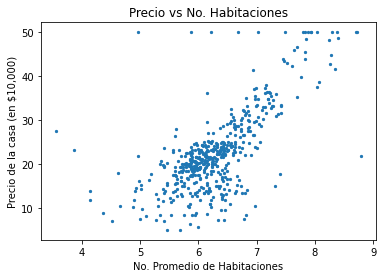

In [31]:
# Gráfico del precio vs habitaciones
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter( bostonDF.RM, bostonDF.PRICE, s=5 )
plt.xlabel( "No. Promedio de Habitaciones" )
plt.ylabel( "Precio de la casa (en $10,000)" )
plt.title( "Precio vs No. Habitaciones")

In [32]:
lm.predict(X)[0:10]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211])

Text(0.5, 1.0, 'Precio real vs Precio Predecido del Valor de las Casas')

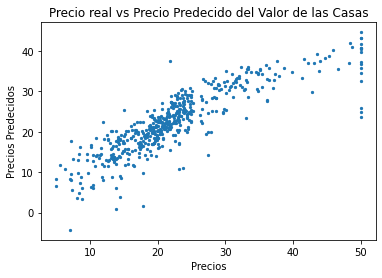

In [33]:
# Se grafica la predicción contra valores reales
plt.scatter( bostonDF.PRICE, lm.predict(X), s=5 )
plt.xlabel("Precios")
plt.ylabel("Precios Predecidos")
plt.title("Precio real vs Precio Predecido del Valor de las Casas")

In [34]:
# Se calcula el cuadrado medio del error
mse = np.mean( (bostonDF.PRICE-lm.predict(X))**2)
print( "Mean squared error = ", mse )

Mean squared error =  21.89483118172922


### Entrenamiento y validación del modelo

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

In [36]:
# X_train, X_test, y_train, y_test = cross_validate.train_test_split( X, bostonDF.PRICE, test_size=0.33, random_state=5 )
X_train, X_test, y_train, y_test = train_test_split( X, bostonDF.PRICE, test_size=0.33, random_state=5 )

print( X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(339, 13) (167, 13) (339,) (167,)


#### Se construye un modelo de regresión lineal usando únicamente los datos de entrenamiento

In [37]:
lm = LinearRegression()
lm.fit( X_train, y_train )

LinearRegression()

In [38]:
pred_train = lm.predict( X_train )
pred_test = lm.predict( X_test )
print( "mse_train = ", np.mean( (y_train-lm.predict(X_train))**2) )
print( "mse_test = ", np.mean( (y_test-lm.predict(X_test))**2) )

mse_train =  19.546758473534663
mse_test =  28.530458765974604


### Se grafican los residuales

Text(0, 0.5, 'Residuales')

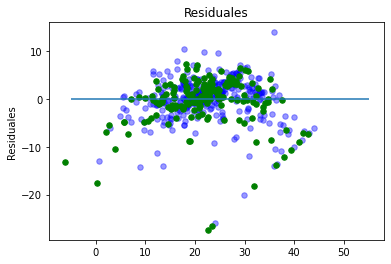

In [39]:
plt.scatter( lm.predict(X_train), lm.predict(X_train) - y_train,
c ='b', s=30, alpha=0.4 )
plt.scatter( lm.predict(X_test), lm.predict(X_test) - y_test,
c ='g', s=30 )
plt.hlines( y=0, xmin=-5, xmax=55)
plt.title( "Residuales" )
plt.ylabel( "Residuales" )

# - Bibliografía Utilizada - 

- *Base de datos "Breast Cancer Wisconsin" [Link](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data).*
- *Información Base de Datos "Boston Housing" [Link](https://www.kaggle.com/c/boston-housing).*
- *Links adicionales de Kaggle con información relevante:*
    - *Kaggle "BreastCancerEDA" [Link](https://www.kaggle.com/cboychinedu/breastcancereda).*
    - *Kaggle "[ANN] Binary Classification" [Link](https://www.kaggle.com/adarsh140799/ann-binary-classification).*
    - *Kaggle "Breast Cancer: Classification and Metrics (98.7%)" [Link](https://www.kaggle.com/barisscal/breast-cancer-classification-and-metrics-98-7).*
- *Información adicional modelos de regeresión:*
    - *Website "Tutorial: Playing with the Boston Housing Data" [Link](http://www.science.smith.edu/dftwiki/index.php/Tutorial:_Playing_with_the_Boston_Housing_Data).*
    - *Website "TensorFlow: Boston House Prices" [Link](https://predictivemodeler.com/2019/10/19/tensorflow-boston-house-prices/).*
    - *Website "Implement Linear Regression on Boston Housing Dataset by PyTorch" [Link](https://medium.com/analytics-vidhya/implement-linear-regression-on-boston-housing-dataset-by-pytorch-c5d29546f938).*